# Исследование данных о российском кинопрокате

В данном исследовании изучим рынок российского кинопроката. Узнаем количество выходящих фильмов, динамику сборов по годам. Проверим как влияют различные возрастные категории на сборы. А так же уделим внимание фильмам которые получили государственную поддержку - какая доля из общего бюджета обычно приходится на неё, насколько такие фильмы успешны в прокате и влияет ли поддержка на рейтинг фильма у зрителей.

Для исследования будем использовать два файла в формате csv, данные данные взяты с портала открытых данных Министерства культуры Российской Федерации.

Файл mkrf_movies.csv - содержит данные о прокатных удостоверениях. mkrf_shows.csv - содержит данные о прокате в российских кинотеатрах.

# Содержание

- [Получение единого датафрейма](#single_df)
- [Предобработка данных](#preprocessing)
  - [Проверка типов данных](#types)
  - [Изучение пропусков в датафрейме](#missing_data)
  - [Изучение дубликатов в датафрейме](#dublicated)
  - [Изучим категориальные значения](#categorical)
  - [Изучим количественные значения](#quantitative)
  - [Добавим новые столбцы](#new_columns)
- [Проведём исследовательский анализ данных](#eda)
  - [Cколько фильмов выходило в прокат каждый год](#movies_by_year)
  - [Динамика проката по годам](#dynamic)
  - [Cреднее и медиана сборов по годам](#avg_med)
  - [Влияние возрастных ограничений](#age_rating)
- [Фильмы с государственной поддержкой](#gov_support)
- [Общий вывод](#conclusion)

<a id='single_df'></a>
## Получение единого датафрейма

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.2f}'.format)

**Читаем исходные файлы**

In [2]:
movies = pd.read_csv('mkrf_movies.csv')
shows = pd.read_csv('mkrf_shows.csv')

**Основная информация о датафреймах**

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


- В датафрейме `movies` находится 7486 строк (проката). В датафрейме `shows` - 3158 строк
- В обоих датафреймах есть колонка `puNumber` содержащая номер прокатного удостоверения по которому мы можем объединить датафремы. У них разный тип данных, поэтому сначала надо привести их к одному типу.

**Первые 15 строк датасета**

In [5]:
pd.set_option('display.max_columns', 50)
movies.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [6]:
shows.head(15)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


**Объединение датафреймов**

Для начала значения в колонке `puNumber` из датафрейма movies переведём в числовой тип методом pandas - to_numeric. Зададим параметр error='coerce', теперь если при переводе будут встречаться ошибки произойдёт замена их на NaN.

In [7]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce')

Посмотрим на сумму пропусков(NaN) появившихся после преобразования.

In [8]:
movies['puNumber'].isna().sum()

1

В данных была одна строка которую неудалось преобразовать в числовой тип. Удалим её.

In [9]:
movies = movies.dropna(subset=['puNumber']).reset_index(drop=True)

При преобразовании методом to_numeric значения получаем в типе float64. Теперь мы можем преобразовать их в целочисленные значения.

In [10]:
movies['puNumber'] = movies['puNumber'].astype('int64')

В обоих датафремах колонки `puNumber` теперь находятся в целочисленном типе int64. Можем объединить их.

In [11]:
data = movies.merge(shows, on='puNumber', how='left')
original_data = data # создали переменную хранящую датасет после объединения данных.
                     # он может приготься в дальнейшем для уточнения сколько данных мы удалили после предобработки.

Посмотрим на общую информацию после объединения.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод по объединению данных**

Произвели объединение из двух датасетов mkrf_movies.csv и mkrf_shows.csv по общей колонке `puNumber` содержащей номера прокатных удостоверний. Для этого произвели замену типа данных из датасета mkrf_movies.csv. При замене типа данных удалили 1 строку.

<a id='preprocessing'></a>
## Предобработка данных

<a id='types'></a>
### Проверка типов данных 

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

**Выведем первые 10 строк.**

In [13]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


**Посмотрим на типы данных в каждом столбце**

In [14]:
data.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Колонка `show_start_date` в формате ISO, преобразуем в datetime, для работы с датой и временем.

In [15]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Колонка `ratings` с рейтингом фильма на кинопоиске в формате строк, преобразуем в вещественный тип с одной цифрой после запятой. Но сначала посмотрим на значения хранящиеся в колонке.

In [16]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Видим что в данной колонке содержатся в двух видах - десятичная дробь и проценты, а также есть пропуски. Преобразуем проценты в десятичные дроби. Сначала удалим знак % с помощью метода .str.rstrip, после этого сделаем преобразование в вещественный тип. Когда колонка будет в типе float, поделим все значачения которые изначально были в процентах на 10, тем самым приведём все значения к одному виду. Пропусками займёмся позже.

In [17]:
data['ratings'] = data['ratings'].str.rstrip('%').astype(float)
data.loc[(data['ratings'] > 10), 'ratings'] = data["ratings"] / 10

In [18]:
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

**Выводы по замене типов данных**

Преобразовали типы данных в двух колонках - `show_start_date` и `ratings`.
- В `show_start_date` сделали преобразование на тип datetime, так как данная колонка содержит только даты.
- В колонке `ratings` понадобилось сделать преобразование из типа object на float. В процессе так же привели все значения к одному виду.

<a id='missing_data'></a>
### Изучение пропусков в датафрейме

**Посмотрим на количество пропусков в датафрейме.**

In [19]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

- В колонке `film_studio` со студией-производителем есть 18 пропусков, так как нет возможности узнать названия, можем заменить эти пропуски на значение 'unknown' (неизвестно), так мы сможем сохранить эти данные, вместо того чтобы их удалять.
- Похожая ситуация в колонке `producer` с продюсером, только тут 568 пропусков, сделам аналогичную замену.
- С колонками `production_country`, `director` и `genres` поступим так-же.

In [20]:
data['film_studio'] = data['film_studio'].fillna('unknown')
data['producer'] = data['producer'].fillna('unknown')
data['production_country'] = data['production_country'].fillna('unknown')
data['director'] = data['director'].fillna('unknown')
data['genres'] = data['genres'].fillna('unknown')

- Отсутсвие значений в колонках `refundable_support`, `nonrefundable_support`, `financing_source` может значить что у остальных фильмов отсутвует государственная поддержка.
- В колонке `budget` такое-же количество пропусков как и в фильмас с гос. поддержкой, предположим что в данном датафрейме у нас есть данные по бюджету только для фильмов с гос. поддержкой.

Пропуски в этих колонках оставляем.

- В колонке `ratings` много пропусков и востановить или заменить мы не имеем возможности. Придётся их оставить, так как удаление приведёт к потере большого количества данных. Эти пропуски не должны повлияет на исследование.
- `box_office` оставляем с пропусками. Их очень много и использование среднего значения или медианы для заполнения пропусков в данном случае может сильно исказить результаты. Предположение что пропуски значат нулевые сборы мы не будем принимать, так как это крайне маловероятный сценарий что сборы 0 рублей тем более учитывая количество пропусков.

**Выводы по пропускам**

При обработке пропусков в части данных заменили значения, другую часть оставили как есть. Пропуски нигде не удалялись.

<a id='dublicated'></a>
### Изучение дубликатов в датафрейме
- Проверим, есть ли в данных дубликаты.

**Посмотрим есть ли в данных явные дубликаты.**

In [21]:
data.duplicated().sum()

0

Явные дубликаты в датафрейме отсутствуют. Будем искать неявные изучаю каждую колонку по отдельности. Они могли появится из-за неправильности заполнения данных, ошибок при конвертации файлов с хранящимися данными в другие форматы, использования разных синтаксисов, системных ошибок при работе с файлами.

<a id='categorical'></a>
### Изучим категориальные значения

**Посмотрим колличество уникальных значений в колонке `title`.**

In [22]:
data['title'].nunique()

6771

Теперь приведём все значения в один регистр и проверим уникальные значения опять.

In [23]:
data['title'] = data['title'].str.lower()
data['title'].nunique()

6761

In [24]:
data['title'] = data['title'].str.strip()
data['title'].nunique()

6761

После приведения к одному регистру избавились от 10 дубликатов. В данной колонке могут встречатся одинаковые значения, дубликатами они не будут являться, так как один и тот же фильм может выходить в повторный прокат.

**Посмотрим на значения хранящиеся в колонке `type`.**

In [25]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видим что в некоторых случаях есть лишние пробелы. Уберём их с помощью метода .str.strip.

In [26]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Избавились от 2 дубликатов.

**Рассмотрим колонку `film_studio`.**

По аналогии с `title` - Приведём к одному регистру.

In [27]:
data['film_studio'].nunique()

5491

In [28]:
data['film_studio'] = data['film_studio'].str.lower()
data['film_studio'].nunique()

5451

После приведения к одному регистру избавились от 40 дубликатов. Удалим пробелы если они есть методом .str.strip.

In [29]:
data['film_studio'] = data['film_studio'].str.strip()
data['film_studio'].nunique()

5423

Избавились ещё от 28 дубликатов после удаления пробелов.

**Посмотрим на `production_country`.**

In [30]:
data['production_country'].nunique()

951

In [31]:
data['production_country'] = data['production_country'].str.lower()
data['production_country'] = data['production_country'].str.strip()
data['production_country'].nunique()

934

Привели колонку `production_country` к одному регистру и удалили пробелы, тем самым избавились от 27 дубликатов.

**Перейдём к колонке `director`.**

In [32]:
data['director'].nunique()

4812

In [33]:
data['director'] = data['director'].str.lower()
data['director'] = data['director'].str.strip()
data['director'].nunique()

4797

Аналогичным образом избавились от 15 дубликатов в этой колонке.

**Посмотрим на `age_restriction`.**

In [34]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Данные в этой колонке выглядят логично, никаких действий не нужно предпринимать.

**Посмотрим на `genres`.**

In [35]:
data['genres'].nunique()

743

In [36]:
data['genres'] = data['genres'].str.lower()
data['genres'] = data['genres'].str.strip()
data['genres'].nunique()

743

В данной колонке нет дубликатов.

**Посмотрим на `financing_source`.**

In [37]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Дубликатов нет.

**Выводы по работе с категориальными данными**

Привели все категоральные значения к одному регистру и избавились от лишних пробелов в значениях. Данный подход привел к выявлению 122 дубликатов. Только в трёх колонках с категориальными значениями не было дубликатов - `age_restriction`, `genres` и `financing_source`.

<a id='quantitative'></a>
### Изучим количественные значения

**Посмотрим на колонку `puNumber`** в ней в каждой строке должны быть уникальные значения. Проверим наличии дубликатов.

In [38]:
data['puNumber'].duplicated().sum()

2

Нашли 2 дубликата. Можем их удалить.

In [39]:
data = data.drop_duplicates('puNumber').reset_index(drop=True)

In [40]:
data['puNumber'].duplicated().sum()

0

Удалили 2 дубликата в `puNumber`.

**Посмотрим на `refundable_support`.**

In [41]:
data['refundable_support'].describe()

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

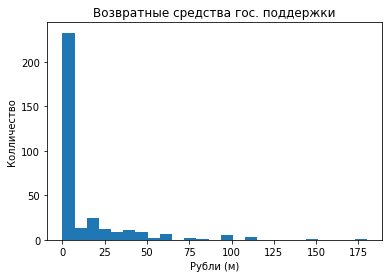

In [42]:
fig, ax = plt.subplots()
ax.hist((data['refundable_support'] / 1000000), bins=25);
ax.set_title('Возвратные средства гос. поддержки')
ax.set_xlabel('Рубли (м)')
ax.set_ylabel('Колличество')
plt.show()

Видим что большое количество значений находится на отметке 0, в том числе медиана на отметке 0 рублей. Несколько значений больше 100м рублей не являются аномалиями, это выбросы. Для данной колонки это логичное распределение, оставляем значения в таком виде.

**Посмотрим на `nonrefundable_support`.**

In [43]:
data['nonrefundable_support'].describe()

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

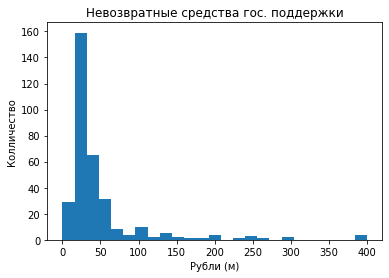

In [44]:
fig, ax = plt.subplots()
ax.hist((data['nonrefundable_support'] / 1000000), bins=25);
ax.set_title('Невозвратные средства гос. поддержки')
ax.set_xlabel('Рубли (м)')
ax.set_ylabel('Колличество')
plt.show()

Большая часть значений находится около 25м рублей. Распределение выглядит похоже на с возвратными средствами, только значения сместились в большую сторону с медианой 30м рублей. Так-же видим похожую тенденцию с выбросами.

**Посмотрим на `budget`.**

In [45]:
data['budget'].describe()

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

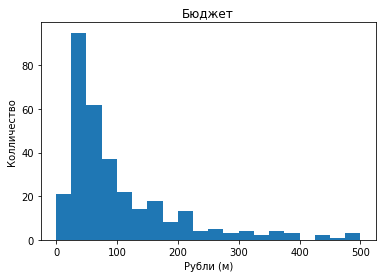

In [46]:
fig, ax = plt.subplots()
ax.hist((data['budget'] / 1000000), bins=20, range=(0, 500));
ax.set_title('Бюджет')
ax.set_xlabel('Рубли (м)')
ax.set_ylabel('Колличество')
plt.show()

В данных есть фильмы с бюджетом 0 рублей, посмотрим сколько таких данных.

In [47]:
(data.query('budget == 0')).shape[0]

17

In [48]:
data = data.query('budget != 0').reset_index(drop=True)

Нашли 17 строк с бюджетом 0 рублей, можем их удалить. Таких данных мало и у фильма не может быть бюджет 0. В остальном данные выглядят реалистично, есть пару выбросов, но ничего необычного. Большая часть пришлась на бюджет в районе 40-60м рублей.

**Посмотрим на `box_office`.**

In [49]:
data['box_office'].describe()

count           3,141.00
mean       76,009,674.78
std       240,250,266.23
min                 0.00
25%            83,950.00
50%         2,284,862.00
75%        23,441,120.00
max     3,073,568,690.79
Name: box_office, dtype: float64

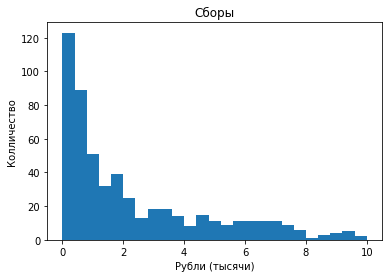

In [50]:
fig, ax = plt.subplots()
ax.hist((data['box_office'] / 1000), bins=25, range=(0, 10));
ax.set_title('Сборы')
ax.set_xlabel('Рубли (тысячи)')
ax.set_ylabel('Колличество')
plt.show()

Есть фильмы с нулевыми сборами, проверим сколько таких строк.

In [51]:
(data.query('box_office == 0')).shape[0]

24

Нашли 24 строки с нулевыми сборами. Такие сборы нереалистичные, удалим их.

In [52]:
data = data.query('box_office != 0').reset_index(drop=True)

Распределение имеет длинный хвост вправо. Медиана находится в районе 2.3м рублей. Большая плотность данный в диапазоне 0-8тысяч рублей. Такие данные выглядят подозрительно низко, возможно при записи была допущена ошибка. Все значения меньше 10т рублей умножим на тысячу, предположим что эти данные ошибочно записаны в тысячах.

In [53]:
data.loc[(data['box_office'] < 10000), 'box_office'] = data["box_office"] * 1000

In [54]:
data['box_office'].describe()

count           3,117.00
mean       76,989,766.74
std       240,958,856.19
min            10,135.00
25%           708,331.00
50%         3,443,223.90
75%        23,766,252.90
max     3,073,568,690.79
Name: box_office, dtype: float64

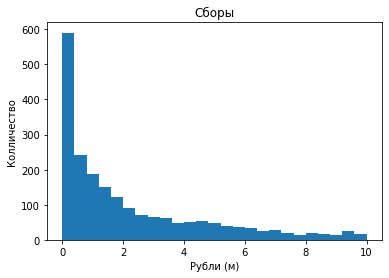

In [55]:
fig, ax = plt.subplots()
ax.hist((data['box_office'] / 1000000), bins=25, range=(0, 10));
ax.set_title('Сборы')
ax.set_xlabel('Рубли (м)')
ax.set_ylabel('Колличество')
plt.show()

**Проверим нет ли случаев когда гос.поддержка превышает бюджет.**

In [56]:
(data['budget'] - (data['refundable_support'] + data['nonrefundable_support'])).min()

5010000.0

Случаев когда поддержка превышает бюджет в данных нет. Минимальная разница - около 5м рублей.

Предобработку почти завершили, посмотрим сколько данных пришлось удалить.

In [57]:
data.shape[0] / original_data.shape[0]

0.9942551770207081

**Выводы по работе с количественными значениями**

- Нашли два дубликата в номерах прокатного удостоверения `puNumber`, удалили их.
- В колонках `refundable_support`, `nonrefundable_support` с возвратными и невозвратынми средствами гос. поддержки изменения не производились. Данных для этих колонок выглядят логично.
- В столбце с бюджетом `budget` было 17 нулевых значений, данные строки удалили.
- В `box_office` нашли 24 строки с нулевыми сборами, удалили их. Много значений подозрительно низких, возможно была ошибка при записи. Все значения меньше 10т рублей умножили на 1000.

После предобработки у нас осталось 99.4% изначальных данных.

<a id='new_columns'></a>
### Добавим новые столбцы

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [58]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

In [59]:
data['main_genre'] = data['genres'].str.split(",").str[0]
data['main_director'] = data['director'].str.split(",").str[0]

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [60]:
data['support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [61]:
data['support'].describe()

count   315.00
mean      0.52
std       0.17
min       0.04
25%       0.37
50%       0.59
75%       0.66
max       0.78
Name: support, dtype: float64

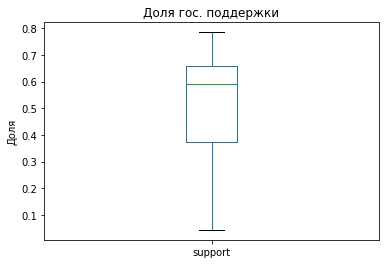

In [62]:
fig, ax = plt.subplots()
data['support'].plot(kind='box');
ax.set_title('Доля гос. поддержки')
ax.set_ylabel('Доля')
plt.show()

**Выводы по добавлению столбцов**

Добавили четыре стобца `year`, `main_genre`, `main_director`, `support` хранящие год проката, основной жанр, главного режисёра и долю гос. поддержки соответсвенно.

В фильмах с гос. поддержкой, медиана доли составляет 59%, распределение имеет хвост влево, тоесть большая часть значений находится в верхнем сегменте.

<a id='eda'></a>
## Проведём исследовательский анализ данных

<a id='movies_by_year'></a>
### Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Для начала создадим переменную в которую положим данные сгруппированные по годам.

In [63]:
year_plot = data.groupby('year').agg(total=('title', 'count'),
                                    box_office=('box_office', 'count'),
                                    box_office_sum=('box_office', 'sum'),
                                    ratings_mean=('ratings', 'mean'),
                                    support=('support', 'count'),
                                    support_mean=('support', 'mean'))

**Посмотрим на  количество фильмов в прокате по годам.**

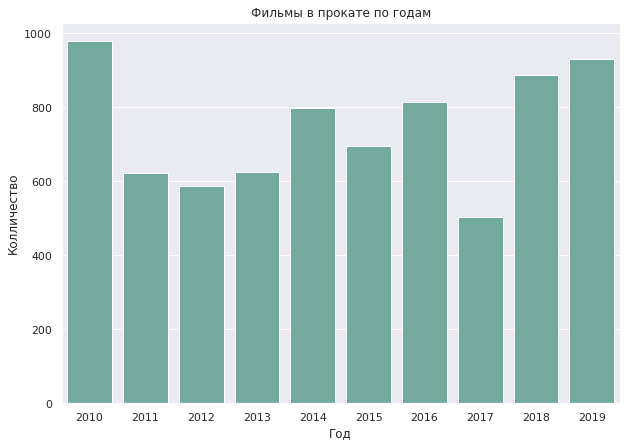

In [64]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))
sns.barplot(
    x=year_plot.index, 
    y='total', 
    data=year_plot, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.title('Фильмы в прокате по годам');
plt.xlabel('Год');
plt.ylabel('Колличество');

Больше всего фильмов в прокате было в 2010 году, потом произошел резкий спад. В 2014 году пошла тенденция на увеличение. В 2017 резкий спад до минимального значения, после этого тенденция начавшаяся с 2014 возобновилась.

Посчитаем какую долю составляют фильмы с указанной информацией по сборам в прокате.

In [65]:
(data['box_office'].shape[0] - data['box_office'].isna().sum()) / data.shape[0]

0.41883902176834187

Только 41.9% данных содержат информацию о сборах.

**Посмотрим на распределение только для фильмов с указанной информацией по сборам.**

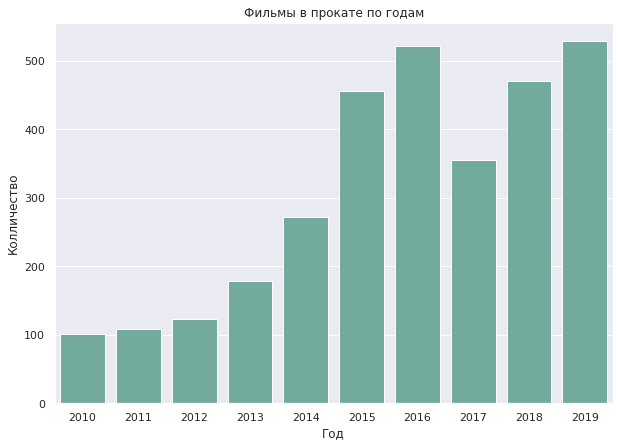

In [66]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))
sns.barplot(
    x=year_plot.index, 
    y='box_office', 
    data=year_plot, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.title('Фильмы в прокате по годам');
plt.xlabel('Год');
plt.ylabel('Колличество');

Видим что в 2010 году всего около 100 фильмов имеют данные о сборах, после этого с каждым годом цифры растут. Посчитаем долю этих фильмов от общего числа.

In [67]:
year_plot['box_office'] / year_plot['total']

year
2010   0.10
2011   0.18
2012   0.21
2013   0.29
2014   0.34
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

- Больше всего данных есть за период с 2015 до 2017, с пиком в 2017г - 70.5%.
- До 2015 года максимальная доля была 34% в 2014 и резко увеличилась до 65.5% в 2015.
- До 2014 года был стабильный рост с 10% в 2010 году.
- Начиная с 2015 года доля не падала меньше 53%.

**Вывод по фильмам в прокате по годам**

По сборам есть информация только для 41.9% данных. Для таких фильмов наблюдается стабильный рост по колличеству в прокате, кроме скачка вниз в 2017 году. Среди всех данных видим похожую картину, только рост менее явный и пик приходится на 2010 после которого был резкий спад.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Все правильно. Для большей наглядности можно совместить все три метрики: количество фильмов, количество фильмов с информацией о сборах и процент - на один график.</div>

<a id='dynamic'></a>
### Изучим, как менялась динамика проката по годам.

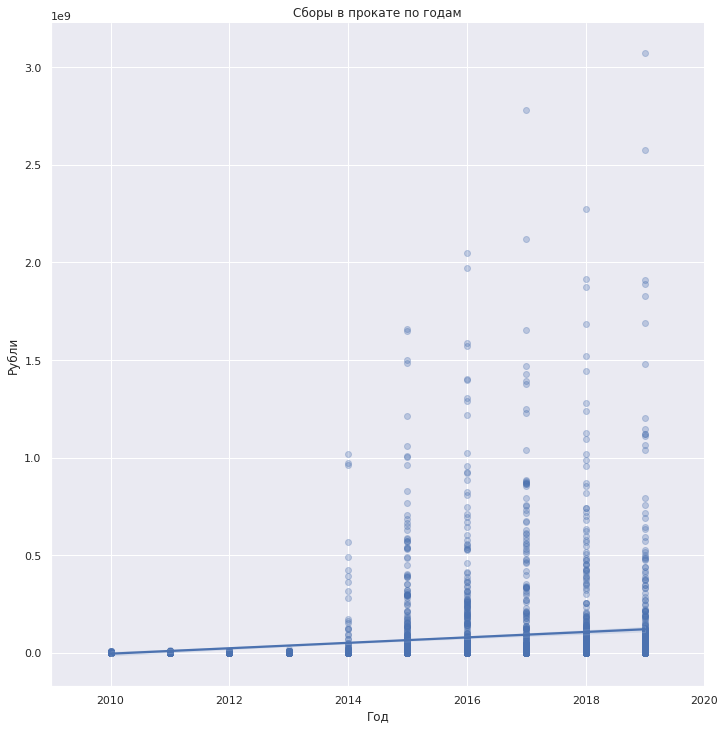

In [68]:
sns.lmplot(x="year",
           y="box_office",
           data=data,
           fit_reg=True,
           height=10, aspect=1,
           scatter_kws={'alpha':0.3});
plt.xlim(2009, 2020);
plt.title('Сборы в прокате по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');

Видим увеличение сборов начиная с 2014 года, так же начинают появлятся большие выбросы и с каждым годом они увеличиваются. Начиная с 2015 года основная масса данных находится примерно в одном диапазоне, до 250м рублей.

**Посмотрим на сумму сборов по годам.**

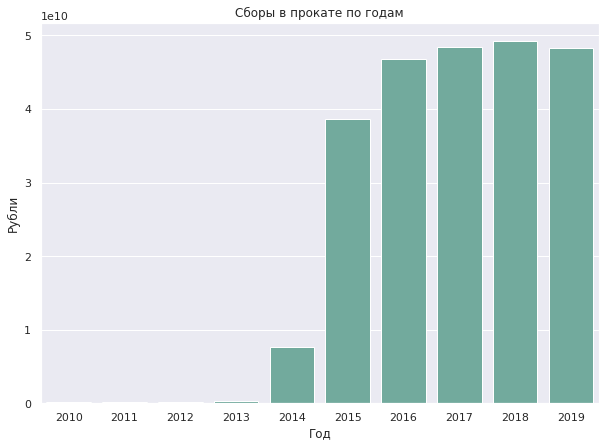

In [69]:
plt.figure(figsize=(10, 7))
sns.barplot(
    x=year_plot.index, 
    y='box_office_sum', 
    data=year_plot, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.title('Сборы в прокате по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');

In [70]:
data.groupby('year')['box_office'].sum()

year
2010      156,158,770.00
2011      237,887,756.00
2012      185,686,513.00
2013      319,444,771.20
2014    7,677,167,151.10
2015   38,602,940,011.09
2016   46,790,123,414.48
2017   48,466,039,353.75
2018   49,251,991,405.20
2019   48,289,663,779.68
Name: box_office, dtype: float64

Наблюдаем резкий скачок в 2015 году, после этого видим плавное увеличение сборов с пиком в 2018 году - около 49 миллиардов рублей. Минимальные сборы - в 2010 году, около 156 миллионов рублей.

<a id='avg_med'></a>
### С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [71]:
data.pivot_table(index='year', values='box_office', aggfunc=['median', 'mean'])

,median,mean
,box_office,box_office
year,,
2010,"660,000.00","1,546,126.44"
2011,"860,810.00","2,182,456.48"
2012,"450,000.00","1,509,646.45"
2013,"650,000.00","1,784,607.66"
2014,"720,000.00","28,224,879.23"
2015,"5,307,879.00","84,655,570.20"
2016,"4,002,836.25","89,636,251.75"
2017,"9,919,415.00","136,524,054.52"


Видим сильное отличие медианы от среднего значения. Такая ситуация возникла из-за выбросов, особенно сильно отличаются значения начиная с 2015 года.

<a id='age_rating'></a>
### Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?

**Создадим переменную и положим в неё данные за период с 2015 до 2019 года.**

In [72]:
data_from_2015 = data.query('year >=2015')

**Посмотрим на суммы сборов по возрастным категориям**

In [73]:
age_plot_2015 = data_from_2015.groupby('age_restriction').agg(box_office=('box_office', 'count'),
                                                              box_office_sum=('box_office', 'sum'))
display(age_plot_2015)

,box_office,box_office_sum
age_restriction,,
«0+» - для любой зрительской аудитории,90,"822,034,455.97"
«12+» - для детей старше 12 лет,344,"59,426,367,534.50"
«16+» - для детей старше 16 лет,797,"75,132,283,925.60"
«18+» - запрещено для детей,791,"40,781,898,568.61"
«6+» - для детей старше 6 лет,311,"55,238,173,479.52"


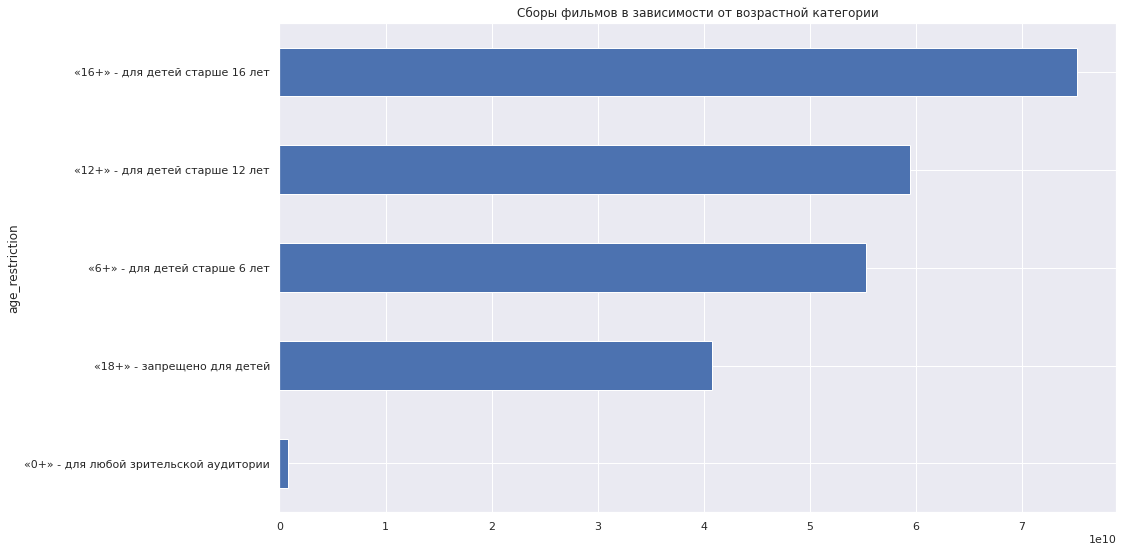

In [75]:
data.query('2015 <= year <= 2019').groupby('age_restriction')['box_office'].sum()\
  .sort_values()\
  .plot(kind = 'barh', title = 'Сборы фильмов в зависимости от возрастной категории'\
        , figsize = (15,9))
plt.show()

- Наиболее прибыльная категория 16+.
- Категории 6+ и 12+ находятся примерно на одном уровне, но 12+ прибыльние.
- 18+ почти в два раза менее прибыльная чем 16+.
- Сумма сборов в категории 0+ 822 миллиона рублей, в то время как в 16+ 75 миллиардов рублей. Очень сильная разница.

**Посмотрим на распределение по годам в каждой категории.**

In [76]:
age_0 = data_from_2015.loc[(data['age_restriction'] == "«0+» - для любой зрительской аудитории")]
age_6 = data_from_2015.loc[(data['age_restriction'] == "«6+» - для детей старше 6 лет")]
age_12 = data_from_2015.loc[(data['age_restriction'] == "«12+» - для детей старше 12 лет")]
age_16 = data_from_2015.loc[(data['age_restriction'] == "«16+» - для детей старше 16 лет")]
age_18 = data_from_2015.loc[(data['age_restriction'] == "«18+» - запрещено для детей")]

In [77]:
def age_group(age_category):
    display(age_category.groupby('year').agg(box_office=('box_office', 'count'),
                                             box_office_sum=('box_office', 'sum')))
    
def age_plot(age_category):
    plt.figure(figsize=(10, 7))
    sns.barplot(
        x='year', 
        y='box_office', 
        data=age_category, 
        estimator=sum, 
        ci=None, 
        color='#69b3a2');
    plt.xlabel('Год');
    plt.ylabel('Рубли');

In [78]:
age_group(age_0)
print('«0+» - для любой зрительской аудитории\n')
age_group(age_6)
print('«6+» - для детей старше 6 лет\n')
age_group(age_12)
print('«12+» - для детей старше 12 лет\n')
age_group(age_16)
print('«16+» - для детей старше 16 лет\n')
age_group(age_18)
print('«18+» - запрещено для детей')

,box_office,box_office_sum
year,,
2015,38,"386,626,998.37"
2016,41,"155,613,458.67"
2017,3,"229,598,930.00"
2018,5,"32,449,002.11"
2019,3,"17,746,066.82"


«0+» - для любой зрительской аудитории



,box_office,box_office_sum
year,,
2015,52,"8,524,125,000.01"
2016,70,"12,059,919,228.24"
2017,44,"12,031,034,131.00"
2018,65,"9,913,759,294.32"
2019,80,"12,709,335,825.95"


«6+» - для детей старше 6 лет



,box_office,box_office_sum
year,,
2015,71,"13,446,622,430.51"
2016,80,"11,165,767,083.96"
2017,41,"7,859,319,760.67"
2018,67,"14,267,291,660.69"
2019,85,"12,687,366,598.67"


«12+» - для детей старше 12 лет



,box_office,box_office_sum
year,,
2015,164,"10,806,948,228.27"
2016,180,"16,598,919,814.74"
2017,120,"18,694,590,951.06"
2018,155,"16,278,405,946.93"
2019,178,"12,753,418,984.60"


«16+» - для детей старше 16 лет



,box_office,box_office_sum
year,,
2015,131,"5,438,617,353.93"
2016,151,"6,809,903,828.87"
2017,147,"9,651,495,581.02"
2018,179,"8,760,085,501.15"
2019,183,"10,121,796,303.64"


«18+» - запрещено для детей


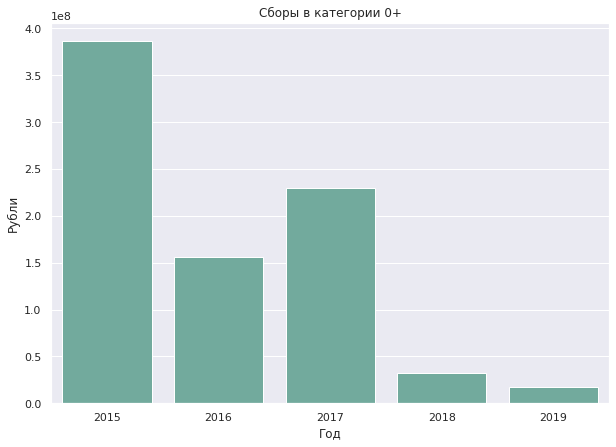

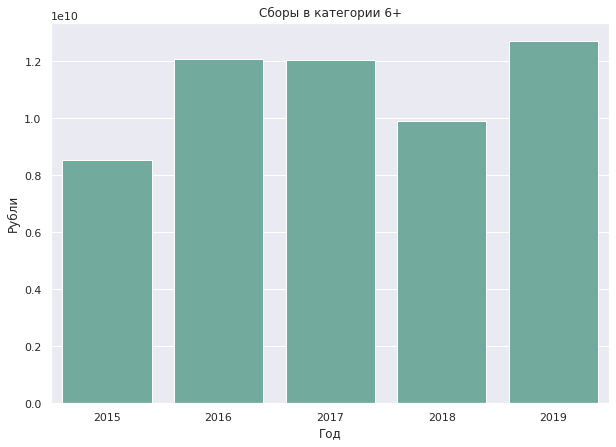

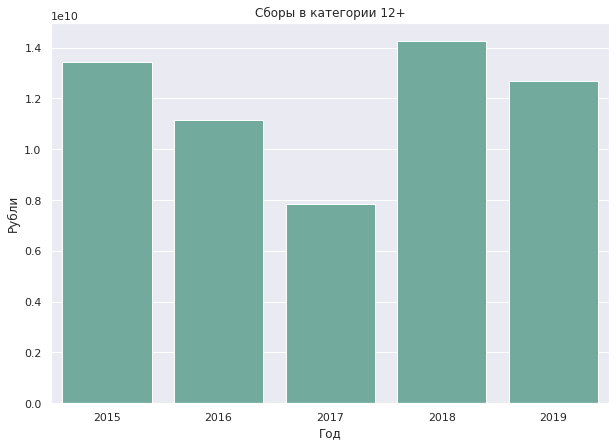

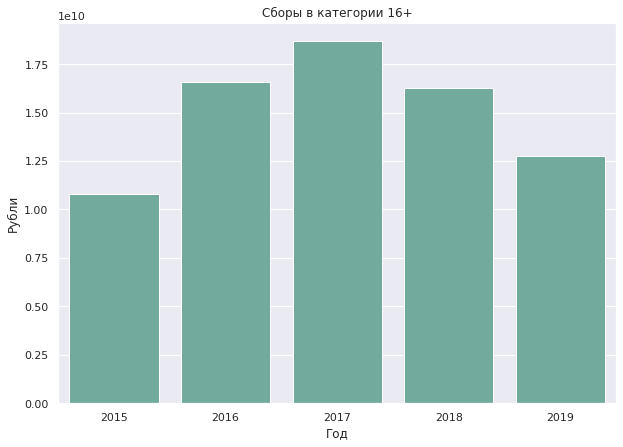

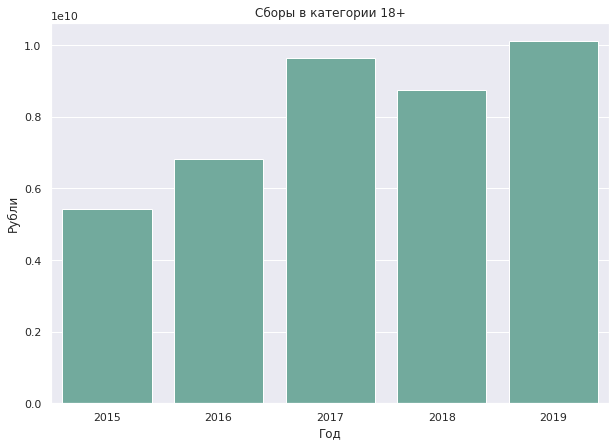

In [79]:
age_plot(age_0)
plt.title('Сборы в категории 0+');
age_plot(age_6)
plt.title('Сборы в категории 6+');
age_plot(age_12)
plt.title('Сборы в категории 12+');
age_plot(age_16)
plt.title('Сборы в категории 16+');
age_plot(age_18)
plt.title('Сборы в категории 18+');

**Выводы по возрастным ограничениям**

- Наблюдаем с каждым годом спад в категории 0+ и рост в 18+. Эти две категории наименее прибыльные, особенно 0+. В категории 0+ спад обусловлен уменьшением количества фильмов, в 2016 году вышло фильмов в этой категории больше чем в предыдущем, но сборы более чем в 2 раза меньше. После этого фильмы в этой категории почти не выходили. В 18+ количество фильмов с каждым годом стабильно увеличивается, отсюда и увеличивается количество сборов.
- В категории 16+ пик приходится на 2017 до которого был стабильный рост, после этого пошел плавный спад. Эта категория является самой прибыльной. В год с большим количеством сборов, вышло меньше всего фильмов. Можем предположить что в этом году вышел какой-то особо успешный фильм или несколько таких фильмов.
- Категория 6+ самая стабильная, сборы находятся более менее на одном уровне после 2016 года с небольшим спадом в 2018.
- В 12+ до 2017 года включительно был спад, а потом резкий скачок вверх в 2018 и тенденция к спаду после этого вернулась. Спад обусловлен тем что в 2017 году вышло в два раза меньше фильмов этой категории чем предыдущем. В общем эта и 6+ категории находятся примерно на одном уровне.

<a id='gov_support'></a>
## Исследуем фильмы, которые получили государственную поддержку

**Создадим переменные в которые положим данные только с теми фильмами у которых есть гос.поддержка и с тему у которых её нет.**

In [90]:
supported_movies = data.query('support > 0').reset_index(drop=True)
not_supported_movies = data.query('support.isna() & production_country == "россия"').reset_index(drop=True)

**Посмотрим на количество фильмов по годам которые полоучили гос.поддержку и среднюю долю в общем бюджете.**

In [91]:
data.groupby('year').agg(support=('support', 'count'),
                         support_sum=('support', 'mean'))

,support,support_sum
year,,
2010,0,NaN
2011,0,NaN
2012,0,NaN
2013,2,0.47
2014,15,0.52
2015,80,0.53
2016,58,0.55
2017,39,0.48
2018,52,0.51


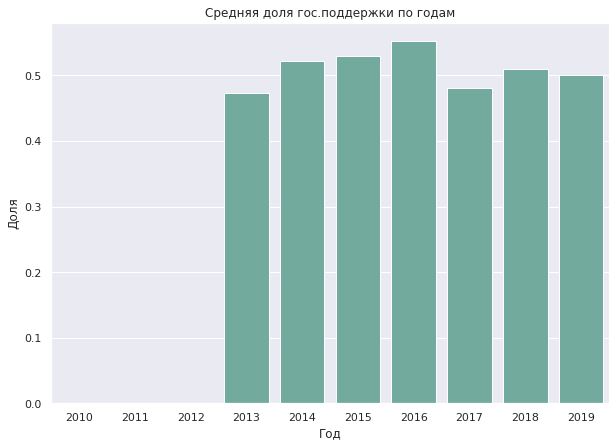

In [92]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))
sns.barplot(
    x=year_plot.index, 
    y='support_mean', 
    data=year_plot, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.title('Средняя доля гос.поддержки по годам');
plt.xlabel('Год');
plt.ylabel('Доля');

Фильмы с гос.поддержкой начали появляться в 2013 году с долей в бюджете 47%. Начиная со следующего года доля гос.поддрежки в таких фильмах не падает ниже 50%, с пиком 55% в 2016 году.

**Сгруппируем данные с гос.поддержкой и без по годам.**

In [93]:
supported_year_plot = supported_movies.groupby('year').agg(total=('title', 'count'),
                                                      box_office_sum=('box_office', 'sum'),
                                                      ratings_mean=('ratings', 'mean'))

not_supported_year_plot = not_supported_movies.groupby('year').agg(total=('title', 'count'),
                                                                   box_office_sum=('box_office', 'sum'),
                                                                   ratings_mean=('ratings', 'mean'))

**Посмотрим на распределение рейтингов фильмов в целом, только с гос.поддержкой и без.**

In [94]:
def ratings_bar_plot(plot):
    plt.figure(figsize=(10, 7))
    sns.barplot(
        x=plot.index, 
        y='ratings_mean', 
        data=plot, 
        estimator=sum, 
        ci=None, 
        color='#69b3a2');
    plt.xlabel('Год');
    plt.ylabel('Оценка');
    
def ratings_scatterplot(dataframe):
    sns.lmplot(x="year",
        y="ratings",
        data=dataframe,
        fit_reg=True,
        height=10, aspect=1,
        scatter_kws={'alpha':0.3});
    plt.xlim(2009, 2020);
    plt.xlabel('Год');
    plt.ylabel('Оценка');

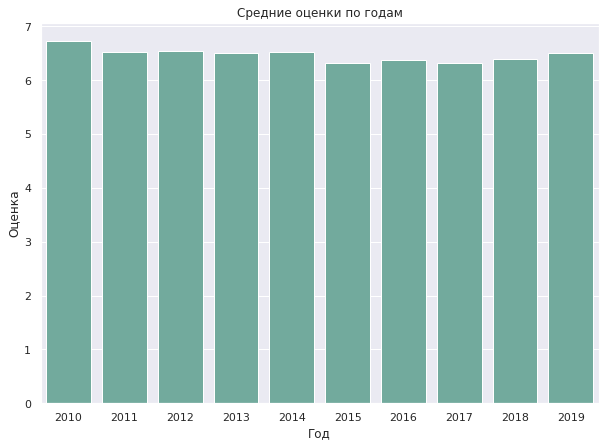

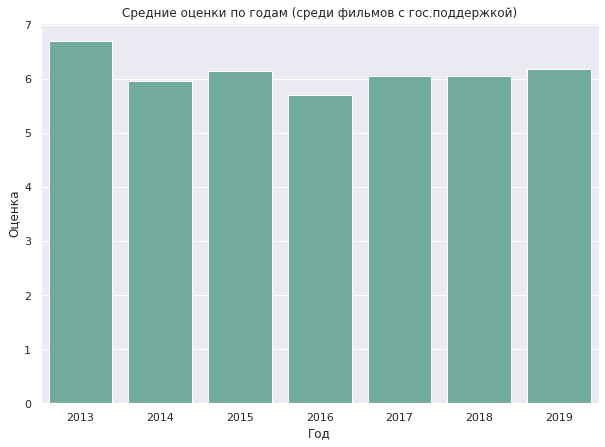

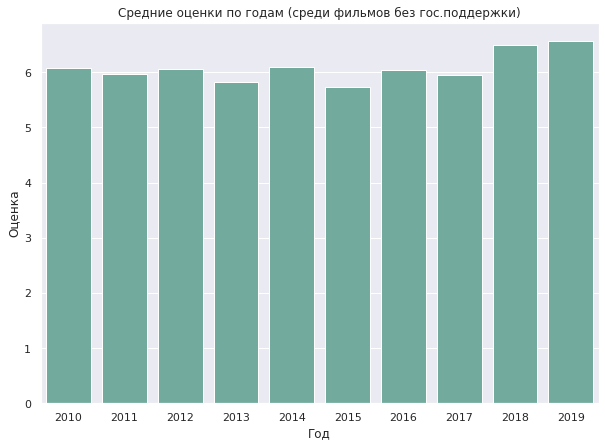

In [95]:
ratings_bar_plot(year_plot)
plt.title('Средние оценки по годам');
ratings_bar_plot(supported_year_plot)
plt.title('Средние оценки по годам (среди фильмов с гос.поддержкой)');
ratings_bar_plot(not_supported_year_plot)
plt.title('Средние оценки по годам (среди фильмов без гос.поддержки)');

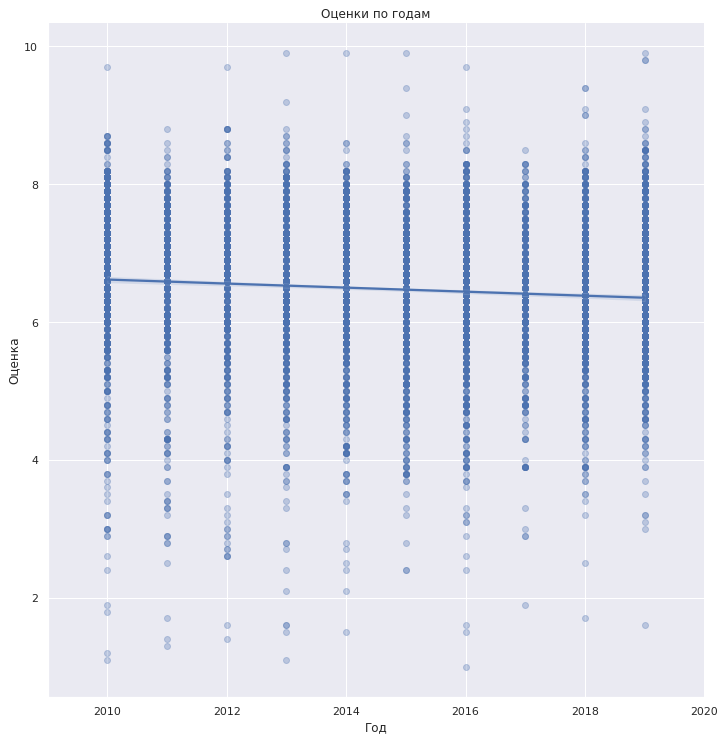

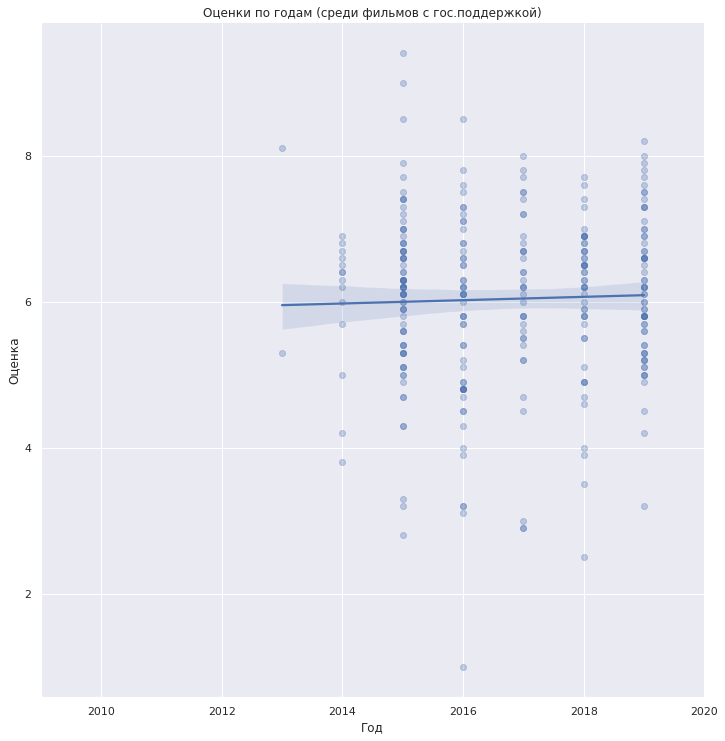

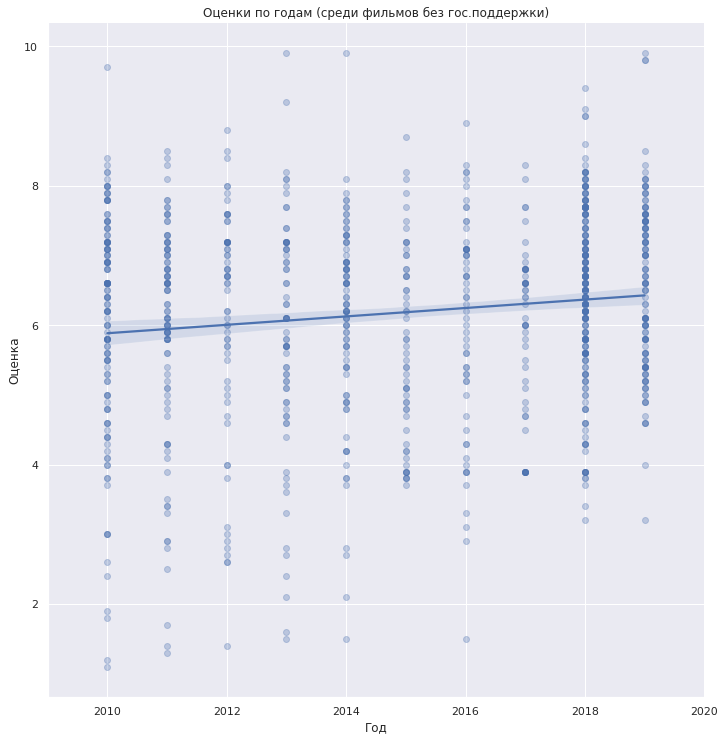

In [98]:
ratings_scatterplot(data)
plt.title('Оценки по годам');
ratings_scatterplot(supported_movies)
plt.title('Оценки по годам (среди фильмов с гос.поддержкой)');
ratings_scatterplot(not_supported_movies)
plt.title('Оценки по годам (среди фильмов без гос.поддержки)');

Средние оценки у фильмов с гос.поддержкой в среднем немного ниже чем в общем, но незначительно. У таких фильмов вариативность оценок ниже и отсутвуют высокие оценки - 9,10.

Если сравнить с российскими фильмами без гос.поддержки, то можем увидеть что в первый год (2013г) средняя оценка значительно выше у фильмов с поддержкой, потом снова падение, в 2015 идёт небольшое увеличение оценки, но потом фильмы без поддержки уверенно вырываются вверх особенно в 2018-2019г.

**Посмотрим в среднем на окупаемость фильмов с гос.поддержкой.**

In [101]:
(supported_movies['box_office'] / supported_movies['budget']).mean()

0.7644189928201633

Такие фильмы не окупаются. Сборы в среднем только 76% от изначального бюжета.

**Посмотрим сколько в прокате собрали фильмы с и без поддержки.**

In [102]:
supported_movies['box_office'].describe()

count             301.00
mean      130,767,955.38
std       339,164,017.38
min            19,820.00
25%         1,231,902.00
50%        12,748,398.30
75%       103,134,751.12
max     3,073,568,690.79
Name: box_office, dtype: float64

In [103]:
not_supported_movies['box_office'].describe()

count             464.00
mean       22,640,761.02
std       108,582,310.36
min            10,310.00
25%           164,312.25
50%         1,286,625.75
75%         4,970,000.00
max     1,682,680,039.03
Name: box_office, dtype: float64

Фильмы с поддержкой собрали намного больше в прокате чем российские фильмы без поддержки, но данных по сборам у фильмов без поддержки мало относительно их колличества.

**Посмотрим на сборы с и без поддержки по возрастным категориям**

In [104]:
supported_movies_age_0 = supported_movies.loc[(supported_movies['age_restriction'] == "«0+» - для любой зрительской аудитории")]
supported_movies_age_6 = supported_movies.loc[(supported_movies['age_restriction'] == "«6+» - для детей старше 6 лет")]
supported_movies_age_12 = supported_movies.loc[(supported_movies['age_restriction'] == "«12+» - для детей старше 12 лет")]
supported_movies_age_16 = supported_movies.loc[(supported_movies['age_restriction'] == "«16+» - для детей старше 16 лет")]
supported_movies_age_18 = supported_movies.loc[(supported_movies['age_restriction'] == "«18+» - запрещено для детей")]
not_supported_movies_age_0 = not_supported_movies.loc[(not_supported_movies['age_restriction'] == "«0+» - для любой зрительской аудитории")]
not_supported_movies_age_6 = not_supported_movies.loc[(not_supported_movies['age_restriction'] == "«6+» - для детей старше 6 лет")]
not_supported_movies_age_12 = not_supported_movies.loc[(not_supported_movies['age_restriction'] == "«12+» - для детей старше 12 лет")]
not_supported_movies_age_16 = not_supported_movies.loc[(not_supported_movies['age_restriction'] == "«16+» - для детей старше 16 лет")]
not_supported_movies_age_18 = not_supported_movies.loc[(not_supported_movies['age_restriction'] == "«18+» - запрещено для детей")]

In [105]:
print()
print('Фильмы с поддержкой')
age_group(supported_movies_age_0)
print('«0+» - для любой зрительской аудитории\n')
age_group(supported_movies_age_6)
print('«6+» - для детей старше 6 лет\n')
age_group(supported_movies_age_12)
print('«12+» - для детей старше 12 лет\n')
age_group(supported_movies_age_16)
print('«16+» - для детей старше 16 лет\n')
age_group(supported_movies_age_18)
print('«18+» - запрещено для детей')


Фильмы с поддержкой


,box_office,box_office_sum
year,,
2014,2,"345,734,656.50"
2015,1,"61,040.00"
2016,1,"658,870.00"
2017,1,"206,478,186.00"
2019,0,0.00


«0+» - для любой зрительской аудитории



,box_office,box_office_sum
year,,
2014,1,"121,225,633.80"
2015,16,"1,799,574,026.57"
2016,11,"2,005,249,255.98"
2017,8,"5,409,740,668.00"
2018,7,"1,570,291,200.66"
2019,16,"1,899,493,192.49"


«6+» - для детей старше 6 лет



,box_office,box_office_sum
year,,
2013,1,"19,957,031.50"
2014,5,"447,916,649.10"
2015,22,"2,016,551,513.09"
2016,22,"1,763,588,848.47"
2017,14,"4,027,989,670.20"
2018,18,"5,883,937,243.78"
2019,15,"4,559,753,940.97"


«12+» - для детей старше 12 лет



,box_office,box_office_sum
year,,
2013,1,"365,353.60"
2014,5,"2,667,420.00"
2015,36,"958,441,486.05"
2016,20,"1,187,127,474.72"
2017,10,"995,197,030.00"
2018,18,"1,968,778,729.26"
2019,23,"1,603,183,457.17"


«16+» - для детей старше 16 лет



,box_office,box_office_sum
year,,
2014,2,"89,643,791.10"
2015,4,"53,107,355.12"
2016,3,"10,090,917.50"
2017,4,"120,109,783.00"
2018,9,"94,650,107.43"
2019,5,"199,590,037.49"


«18+» - запрещено для детей


In [106]:
print()
print('Фильмы без поддержки')
age_group(not_supported_movies_age_0)
print('«0+» - для любой зрительской аудитории\n')
age_group(not_supported_movies_age_6)
print('«6+» - для детей старше 6 лет\n')
age_group(not_supported_movies_age_12)
print('«12+» - для детей старше 12 лет\n')
age_group(not_supported_movies_age_16)
print('«16+» - для детей старше 16 лет\n')
age_group(not_supported_movies_age_18)
print('«18+» - запрещено для детей')


Фильмы без поддержки


,box_office,box_office_sum
year,,
2010,4,"482,215.00"
2011,5,"6,563,071.00"
2012,5,"2,675,623.00"
2013,6,"4,900,301.00"
2014,9,"8,193,467.00"
2015,14,"40,643,516.69"
2016,23,"75,516,026.01"
2017,1,"22,178,956.00"
2018,3,"4,655,340.76"


«0+» - для любой зрительской аудитории



,box_office,box_office_sum
year,,
2012,5,"9,891,770.00"
2013,7,"14,371,395.00"
2014,4,"428,562,719.00"
2015,5,"178,834,192.14"
2016,10,"6,359,814.00"
2017,2,"883,987.00"
2018,2,"1,213,175.00"
2019,5,"23,026,674.00"


«6+» - для детей старше 6 лет



,box_office,box_office_sum
year,,
2010,9,"23,050,364.00"
2011,13,"35,447,905.00"
2012,6,"13,520,264.00"
2013,15,"28,843,389.00"
2014,16,"93,389,405.20"
2015,7,"375,002,838.62"
2016,17,"767,890,426.59"
2017,4,"55,685,603.46"
2018,17,"74,953,662.98"


«12+» - для детей старше 12 лет



,box_office,box_office_sum
year,,
2010,26,"39,051,935.00"
2011,25,"72,339,740.00"
2012,18,"19,707,516.00"
2013,14,"43,292,569.00"
2014,17,"20,381,737.50"
2015,13,"315,955,490.30"
2016,13,"280,483,588.44"
2017,4,"383,759,453.00"
2018,25,"3,052,511,292.14"


«16+» - для детей старше 16 лет



,box_office,box_office_sum
year,,
2010,1,"900,000.00"
2011,0,0.00
2012,2,"680,000.00"
2013,5,"10,410,637.60"
2014,10,"188,913,575.60"
2015,7,"198,668,340.10"
2016,10,"261,191,316.54"
2017,2,"5,639,224.00"
2018,13,"434,357,668.50"


«18+» - запрещено для детей


**Выводы по фильмам с гос.поддержкой**

- Если у фильма есть гос.поддержка то она составляет в среднем около 50% от общего бюджета. Такие фильмы имеют рейтинг немного ниже (по сути такой же) в среднем как и в общей массе фильмы. Окупаемоесть плохая, в среднем фильмы собирают 76% от изначального бюджета, тоесть сборы даже не покрывают бюжет, не говоря уже о какой-либо прибыли.

- При сравнении с российскими фильмами без поддержки выявили что сначала фильмы с поддержкой получили оценки выши, но потом без поддержки начали выходить вперед. Средние сборы фильмов с поддержкой значительно выше, но у нас мало данных по сборам российских фильмов без поддержки, скорей всего данных по многим высокооценённым фильмам у нас нет в наличии. Так же у нас нет данных по бюджету для фильмов без поддержки, тоесть мы не можем узнать их окупаемость.

- Сравнили сборы по возрастным категориям фильмов с и без поддержки. Фильмы с поддержкой лучшие результаты показывают в категории 12+, а без поддержки в категориях 16+, 18+.

<a id='conclusion'></a>
## Общий вывод

**Объединили полученные данные в единый датафрейм.**

**Провели предобработку данных для подготовки к исследовательскому анализу:**
- Провели замену типа данных там где это было необходимо.
- Обработали пропуски. В большинстве случаев заполнением наиболее походящим значением.
- Обработали дубликаты. Нашли дубликаты в основном в категориальных данных. Исправили их.
- Добавили новые столбцы, необходимые для исследовательского анализа.

**Провели анализ данных:**
1. **Изучили количество фильмов выходящих каждый год.**

В наличии данные о выходах в прокате с 2010 до 2019 года.
- Больше всего вышло в 2010, после этого на следующий год был резкий спад и в дальнейшем пошел стабильный рост, с одним провалом в 2017 году.
- Данные по сборам имеем только для 41.9% фильмов. В этих данных аналогичная тенденция, кроме 2010 года, тут отсутвует пик.

2. **Изучили динамику проката.**

В 2015 году наблюдается резкий скачок по сравнению с 2014 годом. После этого сборы растут с каждым годом. Так же растут и выбросы с самым большим в 2019 году.

3. **Сравнили медиану и среднее значение сборов.**

Медиана сильно отличается от среднего из-за большого колличества выбросов. Таблица по годам находится по [ссылке](#box_office_pivot).

4. **Исследовали влияние возрастных категорий.**

Выяснили что возрастная категория влияет на сборы следующим образом:
- Самая прибыльная категория 16+. Пик по сборам пришелся на 2017 год, в котором видимо вышел очень успешный или несколько таких фильмов. Данный вывод мы можем сделать по тому что в данном году в прокате было меньше всего фильмов в этой категории.
- На втором месте находится категория 12+. Данная категория демонстрирует тенденцию на снижение сборов.
- Категория 6+ отстаёт от 12+ не сильно, но демонстрирует большую стабильность.
- 18+ показывает результаты почти в 2 раза ниже чем самая прибыльная категория. Но с каждым годом сборы показывают лучшие результаты чем в предыдущий и количество фильмов растёт.
- На последнем месте категории 0+. Количество фильмов в этой категории в 2017 году резко сократилось, соотвенно и сборы. В 2019 году только 3 фильма есть в датасете в данной категории.

5. **Исследовали фильмы с гос.поддержкой.**

- Фильмы с гос.поддержкой не окупаются, в среднем не отбивают даже свой бюджет. Выяснили что если у фильма есть гос.поддержка, то в среднем она составляет 50%  от общего бюджета.
- Рейтинг с гос.поддержкой незначительно ниже чем по общей выборке и ниже чем у российских фильмов без поддержки (в 2013г и 2015г были исключения).
- С поддержкой сборы в среднем выше чем без поддержки, но у нас мало данных о сборах для фильмов без поддержки относительно их количества в датасете.
- Провели сравнение по возрастным категориям и выяснили что фильмы с гос.поддержкой больше всего собирают в категории 12+, а без поддержки в категориях 16+ и 18+.

**Можно порекомендовать сосредоточится на фильмах категории 12+, в целом она находится на втором месте по сборам и фильмы с гос.поддержкой лучше всего себя зарекомендовали в ней. Так же категория 6+ очень стабильна. В будущем можно расмотреть категорию 16+, у неё есть потенциал. С 0+ и 18+ лучшие не связыватся. Категория 0+ не успешна по всем выборкам. 18+ успешна только для фильмов без гос.поддержки.**